<a href="https://colab.research.google.com/github/Sivaramjallu001/Yoga_Pose/blob/main/Yoga_pose_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
# Image size and batch
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/yoga/DATASET/TRAIN",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/yoga/DATASET/TEST',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


In [ ]:
#CNN ARCHITECTURE

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 yoga pose classes
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,306,181 (12.61 MB)

 Trainable params: 3,305,733 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
his = model.fit(train_data, epochs=20, validation_data=val_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/34 ━━━━━━━━━━━━━━━━━━━━ 6:04 16s/step - accuracy: 0.2488 - loss: 6.4548

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 894s 26s/step - accuracy: 0.3135 - loss: 5.3518 - val_accuracy: 0.3617 - val_loss: 1.7376
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 610ms/step - accuracy: 0.4121 - loss: 1.5066 - val_accuracy: 0.1660 - val_loss: 5.9251
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 636ms/step - accuracy: 0.5093 - loss: 1.2643 - val_accuracy: 0.2277 - val_loss: 4.7231
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 20s 604ms/step - accuracy: 0.5814 - loss: 1.0979 - val_accuracy: 0.1766 - val_loss: 5.0832
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 687ms/step - accuracy: 0.6201 - loss: 1.0197 - val_accuracy: 0.3553 - val_loss: 4.1036
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 664ms/step - accuracy: 0.6184 - loss: 0.9048 - val_accuracy: 0.3660 - val_loss: 3.2339
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 622ms/step - accuracy: 0.6519 - loss: 0.8734 - val_accuracy: 0.4936 - val_loss: 1.5541
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 641ms/step - accuracy: 0.6677 - loss: 0.8463 - val_accuracy: 0.4872

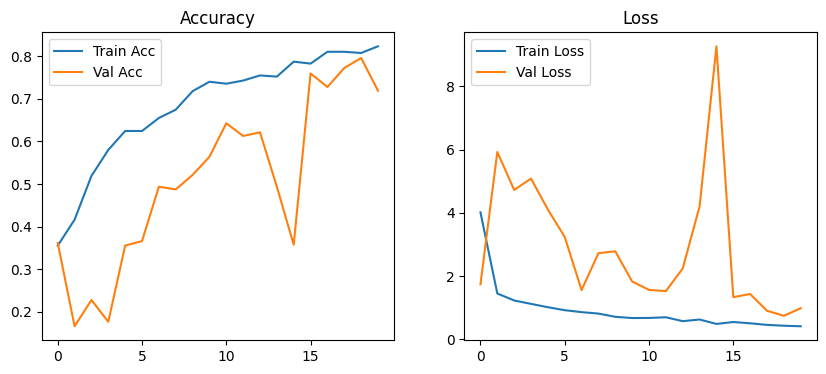

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(his.history['accuracy'], label='Train Acc')
plt.plot(his.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(his.history['loss'], label='Train Loss')
plt.plot(his.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.show()


In [ ]:
model.save("yoga_pose_cnn_model.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


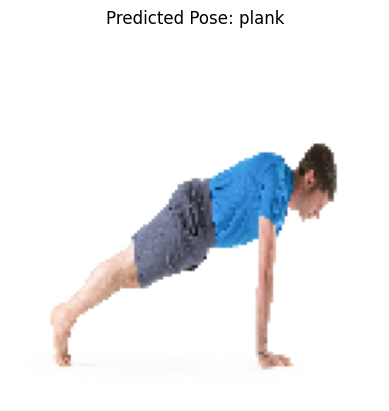

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TEST/plank/00000004.JPG'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


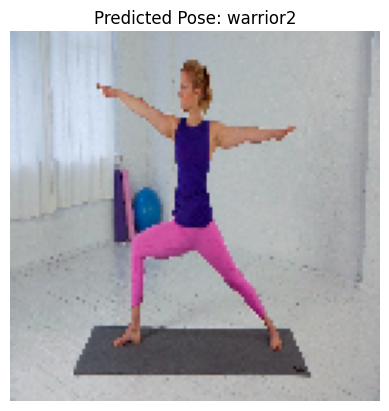

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TEST/warrior2/00000014.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
his2 = model.fit(train_data, epochs=25, validation_data=val_data)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 23s 690ms/step - accuracy: 0.8406 - loss: 0.3781 - val_accuracy: 0.7170 - val_loss: 0.9454
Epoch 2/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 626ms/step - accuracy: 0.8386 - loss: 0.4194 - val_accuracy: 0.7638 - val_loss: 0.6409
Epoch 3/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 655ms/step - accuracy: 0.8555 - loss: 0.3592 - val_accuracy: 0.8106 - val_loss: 0.6804
Epoch 4/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 649ms/step - accuracy: 0.8385 - loss: 0.3753 - val_accuracy: 0.7957 - val_loss: 0.8514
Epoch 5/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 626ms/step - accuracy: 0.8331 - loss: 0.3867 - val_accuracy: 0.8404 - val_loss: 0.5310
Epoch 6/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 22s 638ms/step - accuracy: 0.8773 - loss: 0.2786 - val_accuracy: 0.8447 - val_loss: 0.7107
Epoch 7/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 633ms/step - accuracy: 0.8509 - loss: 0.3395 - val_accuracy: 0.8106 - val_loss: 0.7840
Epoch 8/25
34/34 ━━━━━━━━━━━━━━━━━━━━ 21s 627ms/step - accuracy: 0.8821 - loss: 0.2801 - val_accu

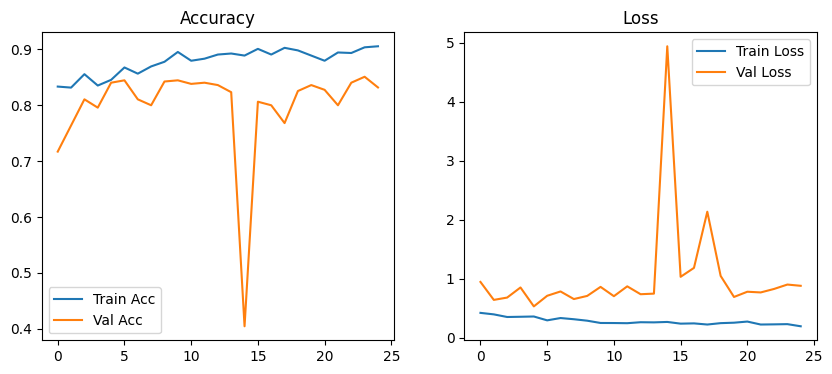

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(his2.history['accuracy'], label='Train Acc')
plt.plot(his2.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(his2.history['loss'], label='Train Loss')
plt.plot(his2.history['val_loss'], label='Val Loss')
plt.legend(); plt.title("Loss")
plt.show()


In [ ]:
model.save("yoga_pose_cnn_model_1.h5")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


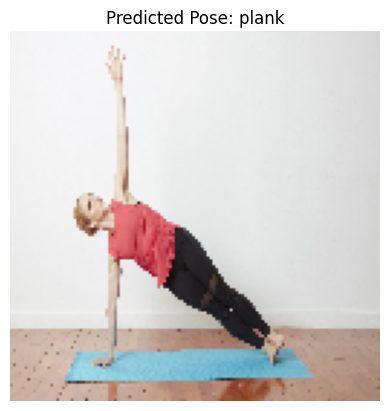

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TEST/plank/00000037.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


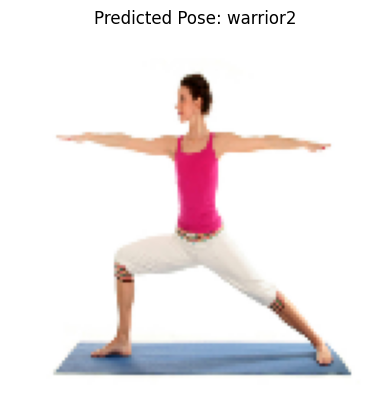

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TEST/warrior2/00000017.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


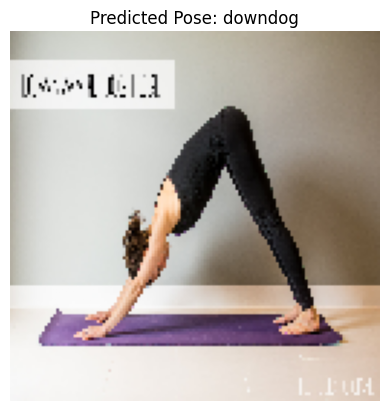

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TEST/downdog/00000019.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


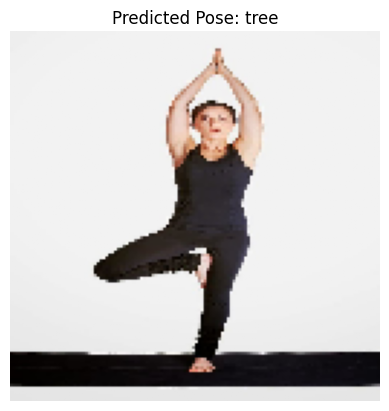

In [ ]:
c

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


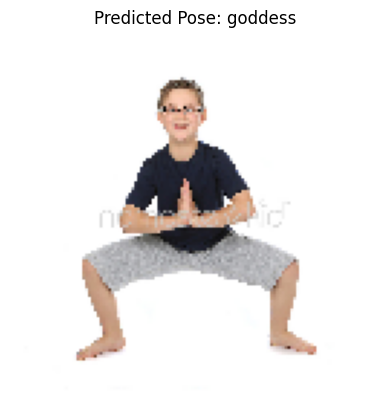

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TEST/goddess/00000015.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


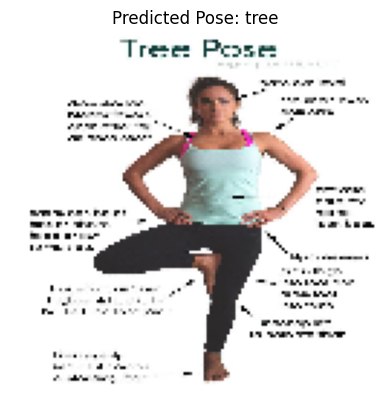

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = '/content/drive/MyDrive/yoga/DATASET/TRAIN/tree/00000076.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# Make prediction
pred = model.predict(img_array_exp)
classes = list(train_data.class_indices.keys())
predicted_class = classes[np.argmax(pred)]

# Display the image with predicted label
plt.imshow(img_array)  # img_array is already scaled 0-1
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()
